In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [62]:
data = pd.read_csv('Least Risk with Adjustment.csv')
data.set_index(data.columns[0], inplace= True)

In [63]:
data.columns

Index(['MFIN.JK', 'SGRO.JK', 'BBCA.JK', 'CEKA.JK', 'UNTR.JK', 'AMFG.JK',
       'SRTG.JK', 'LTLS.JK', 'IGAR.JK', 'PALM.JK', 'ASII.JK', 'ADMF.JK',
       'HRTA.JK'],
      dtype='object')

In [71]:
stock = data.columns
year = 2020
ds = str(year-3)+'-12-01'
de = str(year+1)+'-12-01'
df = pd.DataFrame(columns=stock)
for i in stock :
    temp = yf.Ticker(i).history(period =  "3y" , start = ds ,end =de ,interval = '1mo',actions=False).dropna()[['Close']]
    if temp.shape[0] == 49:
        log_return = np.log(temp['Close']/temp['Close'].shift(1)).dropna()
        df[i] = log_return
df.dropna(axis = 1, inplace = True)

In [74]:
df['total_return'] = df.dot(data.loc['Percentage'])
df['total_return']

Date
2018-01-01    0.009342
2018-02-01    0.024128
2018-03-01   -0.012858
2018-04-01   -0.023638
2018-05-01    0.005638
2018-06-01   -0.027378
2018-07-01    0.032816
2018-08-01   -0.006851
2018-09-01    0.000908
2018-10-01   -0.010472
2018-11-01    0.000175
2018-12-01    0.027243
2019-01-01    0.008905
2019-02-01    0.013162
2019-03-01    0.041859
2019-04-01    0.001083
2019-05-01   -0.015711
2019-06-01    0.018820
2019-07-01    0.024871
2019-08-01   -0.029412
2019-09-01   -0.015408
2019-10-01    0.045365
2019-11-01   -0.039690
2019-12-01    0.021410
2020-01-01   -0.021268
2020-02-01   -0.079757
2020-03-01   -0.049590
2020-04-01   -0.016738
2020-05-01   -0.018637
2020-06-01    0.012625
2020-07-01    0.020497
2020-08-01    0.011955
2020-09-01   -0.051734
2020-10-01    0.026620
2020-11-01    0.072212
2020-12-01    0.011582
2021-01-01    0.038367
2021-02-01    0.053504
2021-03-01   -0.028293
2021-04-01    0.037310
2021-05-01    0.043254
2021-06-01    0.007006
2021-07-01    0.016377
2021-0

In [102]:
a = df[9::12][df.columns[:-1]].describe().loc[['mean', 'std', '25%', '50%', '75%']].T
a[a['mean']>0].T

,MFIN.JK,SGRO.JK,BBCA.JK,CEKA.JK,SRTG.JK,LTLS.JK,IGAR.JK,PALM.JK,ASII.JK,ADMF.JK,HRTA.JK
mean,0.021760,0.048334,0.036593,0.038199,0.033326,0.013941,0.022480,0.067617,0.102718,0.010549,0.027051
std,0.066896,0.085212,0.040908,0.054726,0.052520,0.013735,0.028173,0.176412,0.064161,0.027846,0.036906
25%,-0.018281,0.007121,0.021472,0.024450,0.011042,0.003513,0.000000,-0.047064,0.067040,0.001018,0.007937
50%,-0.000225,0.041804,0.050628,0.051230,0.032533,0.013663,0.015774,0.026070,0.081666,0.011147,0.013356
75%,0.039817,0.083016,0.065750,0.064978,0.054817,0.024091,0.038254,0.140751,0.117344,0.020678,0.032470


In [92]:
a.describe()

,MFIN.JK,SGRO.JK,BBCA.JK,CEKA.JK,UNTR.JK,AMFG.JK,SRTG.JK,LTLS.JK,IGAR.JK,PALM.JK,ASII.JK,ADMF.JK,HRTA.JK
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,0.021760,0.048334,0.036593,0.038199,-0.027038,-0.033269,0.033326,0.013941,0.022480,0.067617,0.102718,0.010549,0.027051
std,0.066896,0.085212,0.040908,0.054726,0.072185,0.040041,0.052520,0.013735,0.028173,0.176412,0.064161,0.027846,0.036906
min,-0.030772,-0.047791,-0.020921,-0.039029,-0.098971,-0.062975,-0.029705,0.000000,0.000000,-0.090287,0.051672,-0.024098,0.000000
25%,-0.018281,0.007121,0.021472,0.024450,-0.081970,-0.055753,0.011042,0.003513,0.000000,-0.047064,0.067040,0.001018,0.007937
50%,-0.000225,0.041804,0.050628,0.051230,-0.030633,-0.047764,0.032533,0.013663,0.015774,0.026070,0.081666,0.011147,0.013356
75%,0.039817,0.083016,0.065750,0.064978,0.024299,-0.025280,0.054817,0.024091,0.038254,0.140751,0.117344,0.020678,0.032470
max,0.118264,0.157520,0.066036,0.089365,0.052083,0.025425,0.097945,0.028438,0.058372,0.308615,0.195869,0.044000,0.081493


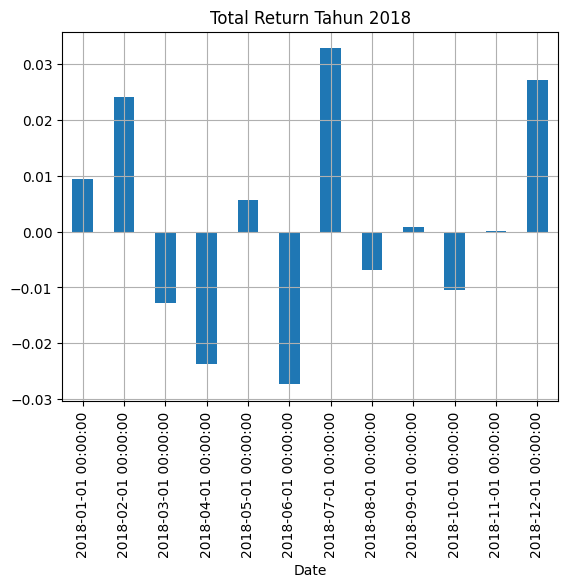

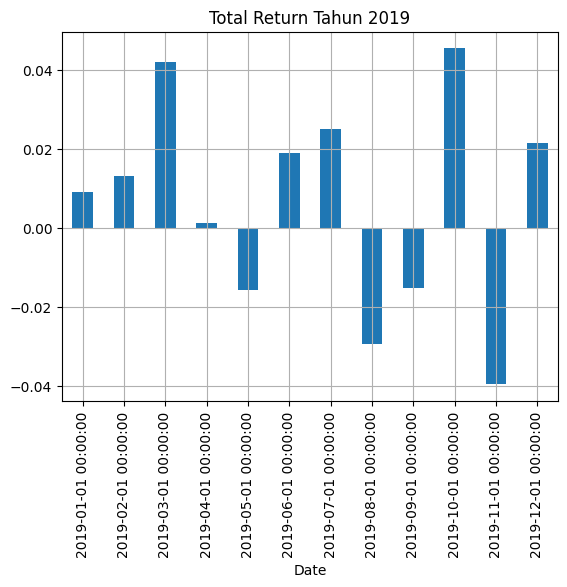

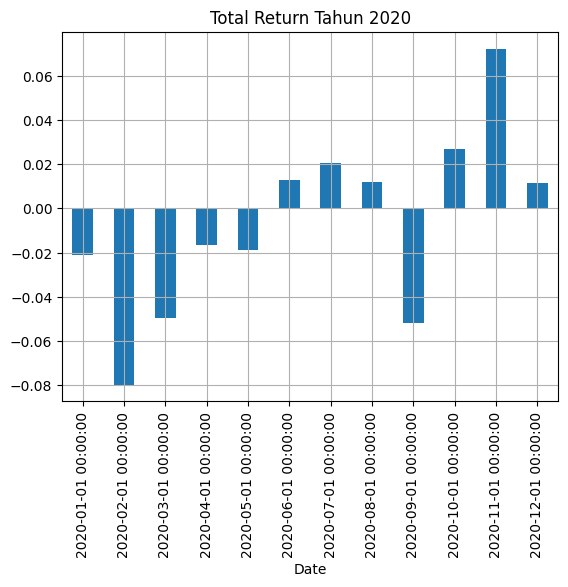

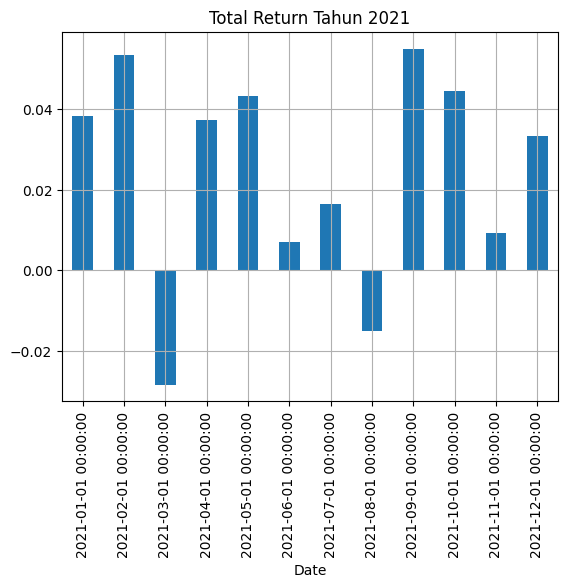

In [75]:
for i in range(4):
    df.iloc[i*12:(i+1)*12]['total_return'].plot.bar()
    plt.title(f'Total Return Tahun {2018+i}')
    plt.grid(True)
    plt.show()